In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [2]:
class_name = ["dandelion", "daisy", "tulips", "sunflowers", "roses"]
train_dataset, test_dataset = tfds.load(name="tf_flowers",
                                        split=['train[:70%]', 'train[70%:]'], 
                                        as_supervised=True)

In [3]:
# import matplotlib.pyplot as plt

In [4]:
# for index, (image, label) in enumerate(train_dataset.take(10)):
#     plt.subplot(2, 5, index + 1)
#     plt.imshow(image)
#     plt.title(class_name[label])
#     plt.axis("off")

In [5]:
def scale(image, label):
    return tf.image.resize(image, [200, 200]) / 255, label

In [6]:
train_dataset = train_dataset.map(scale).batch(32)
test_dataset = test_dataset.map(scale).batch(32)

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [9]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
81/81 [==============================] - 44s 526ms/step - loss: 1.3080 - accuracy: 0.4928 - val_loss: 0.9868 - val_accuracy: 0.6294
Epoch 2/10
81/81 [==============================] - 42s 513ms/step - loss: 0.8398 - accuracy: 0.6824 - val_loss: 0.9527 - val_accuracy: 0.6367
Epoch 3/10
81/81 [==============================] - 44s 544ms/step - loss: 0.5289 - accuracy: 0.8190 - val_loss: 1.1395 - val_accuracy: 0.6176
Epoch 4/10
81/81 [==============================] - 42s 524ms/step - loss: 0.2756 - accuracy: 0.9132 - val_loss: 1.4422 - val_accuracy: 0.6058
Epoch 5/10
81/81 [==============================] - 42s 515ms/step - loss: 0.2029 - accuracy: 0.9428 - val_loss: 1.6648 - val_accuracy: 0.6058
Epoch 6/10
81/81 [==============================] - 42s 520ms/step - loss: 0.1630 - accuracy: 0.9490 - val_loss: 1.8625 - val_accuracy: 0.6094
Epoch 7/10
81/81 [==============================] - 44s 540ms/step - loss: 0.0871 - accuracy: 0.9774 - val_loss: 2.2647 - val_accuracy: 0.6031

In [10]:
import matplotlib.pyplot as plt

def plot_model(accuracy, val_accuracy):
    plt.figure(figsize=(8,4))
    plt.plot(accuracy, "o-")
    plt.plot(val_accuracy, "o--")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend(["Training", "validation"])
    plt.show()

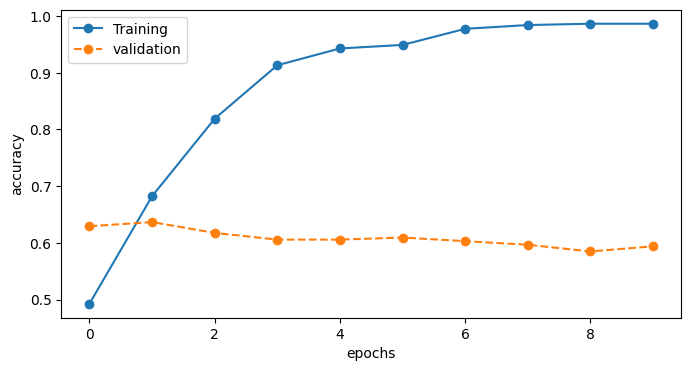

In [11]:
plot_model(history.history["accuracy"], history.history["val_accuracy"])

In [12]:
keras.backend.clear_session()

In [13]:
class RBlock(keras.layers.Layer):
    def __init__(self, n_neurons, **kwargs):
        self.n_neurons = n_neurons
        super().__init__(**kwargs)
        
        self.hidden_layers = [keras.layers.Conv2D(self.n_neurons, (3, 3), activation="relu"), 
                              keras.layers.MaxPool2D((2, 2))]
        
        
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden_layers:
            Z = layer(Z)
        print(Z.shape)
        print(inputs.shape)
        return Z
        
class RModel(keras.models.Model):
    def __init__(self, out_dim, **kwargs):
        self.out_dim = out_dim
        super().__init__(**kwargs)
        
        self.hidden_1 = [keras.layers.Conv2D(32, (3, 3), activation="relu"),
                         keras.layers.MaxPool2D((2, 2))]
        
        self.block_1 = RBlock(32)
        self.block_2 = RBlock(32)
        
        self.out = [keras.layers.Flatten(), 
                    keras.layers.Dense(512, activation="relu"), 
                    keras.layers.Dense(self.out_dim, activation="softmax")]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden_1:
            Z = layer(Z)
        Z = self.block_1(Z)
        Z = self.block_2(Z)
        
        for layer in self.out:
            Z = layer(Z)
            
        return Z
        

In [14]:
model = RModel(5)
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
(None, 48, 48, 32)
(None, 99, 99, 32)
(None, 23, 23, 32)
(None, 48, 48, 32)
(None, 48, 48, 32)
(None, 99, 99, 32)
(None, 23, 23, 32)
(None, 48, 48, 32)
81/81 [==============================] - ETA: 0s - loss: 1.4377 - accuracy: 0.4329(None, 48, 48, 32)
(None, 99, 99, 32)
(None, 23, 23, 32)
(None, 48, 48, 32)
81/81 [==============================] - 49s 594ms/step - loss: 1.4377 - accuracy: 0.4329 - val_loss: 1.0810 - val_accuracy: 0.5813
Epoch 2/10
81/81 [==============================] - 46s 565ms/step - loss: 0.9701 - accuracy: 0.6271 - val_loss: 1.0317 - val_accuracy: 0.6167
Epoch 3/10
81/81 [==============================] - 45s 561ms/step - loss: 0.7748 - accuracy: 0.7135 - val_loss: 1.0409 - val_accuracy: 0.6122
Epoch 4/10
81/81 [==============================] - 46s 562ms/step - loss: 0.5515 - accuracy: 0.8120 - val_loss: 1.1742 - val_accuracy: 0.6067
Epoch 5/10
81/81 [==============================] - 46s 564ms/step - loss: 0.3413 - accuracy: 0.8930 - val_loss: 1.330

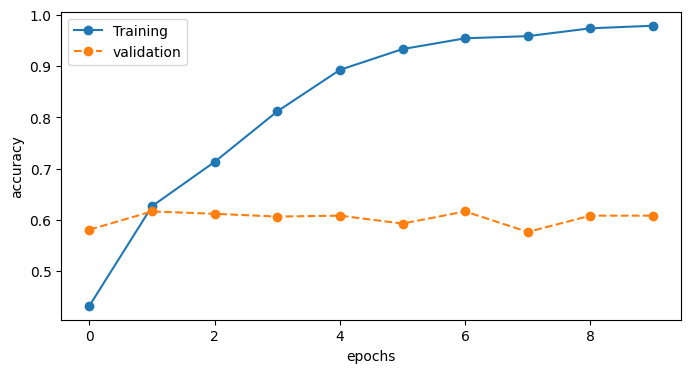

In [15]:
plot_model(history.history["accuracy"], history.history["val_accuracy"])